# 1.5 ns CST simulations



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pnd
import glob

In [25]:
fpath = '/Users/esenes/work/Diffraction-Cherenkov/CST-triangular-prism-tests/'
folders = 'prism_20mm_side_50mmbehind_7cell_1cmbore_1ns_scan/'
field_path = 'Probe-Signals/'

# time domain filenames
f_comp = ['E-Field (-75 0 0)(Abs) (pb).txt',
          'E-Field (-75 0 0)(X) (pb).txt',
          'E-Field (-75 0 0)(Y) (pb).txt',
          'E-Field (-75 0 0)(Z) (pb).txt',
          'E-Field (75 0 0)(Abs) (pb).txt',
          'E-Field (75 0 0)(X) (pb).txt',
          'E-Field (75 0 0)(Y) (pb).txt',
          'E-Field (75 0 0)(Z) (pb).txt',
          'E-Field (-25 0 35)(Abs) (pb).txt',
          'E-Field (-25 0 35)(X) (pb).txt',
          'E-Field (-25 0 35)(Y) (pb).txt',
          'E-Field (-25 0 35)(Z) (pb).txt',
          'E-Field (25 0 35)(Abs) (pb).txt',
          'E-Field (25 0 35)(X) (pb).txt',
          'E-Field (25 0 35)(Y) (pb).txt',
          'E-Field (25 0 35)(Z) (pb).txt']

In [29]:
fpath+folders+field_path+f_comp[0]

'/Users/esenes/work/Diffraction-Cherenkov/CST-triangular-prism-tests/prism_20mm_side_50mmbehind_7cell_1cmbore_1ns_scan/Probe-Signals/E-Field (-75 0 0)(Abs) (pb).txt'

In [33]:
%ls -l "/Users/esenes/work/Diffraction-Cherenkov/CST-triangular-prism-tests/prism_20mm_side_50mmbehind_7cell_1cmbore_1ns_scan/Probe-Signals/E-Field (-75 0 0)(Abs) (pb).txt"



-rw-r--r--  1 esenes  staff  1020026 Apr  5 18:25 /Users/esenes/work/Diffraction-Cherenkov/CST-triangular-prism-tests/prism_20mm_side_50mmbehind_7cell_1cmbore_1ns_scan/Probe-Signals/E-Field (-75 0 0)(Abs) (pb).txt


In [34]:
def read_CST_param_results(fname,delimiter = '#', verbose=True):
    '''
    Read a CST ASCII output file from a parametric simulation

    Inputs:
    - fname:        filename, including path
    - delimiter:    comment delimiter (default = #)
    - verbose:      print the headers as you parse
    
    Outputs:
    - file_divided: the file split at each delimiter. Data are
                    numpy arrays, the rest are strings.
    - data_flag:    flag for the data
    
    Access the data after the split as file_divided[data_flag]. 
    The other lines are the headers, printed when the function 
    is called.

    Last modified: 08.04.2019 by Eugenio Senes
    '''

    with open(fname,'r') as f:
        full_txt = f.readlines()
        row_n_delim = []
        #search the delimiters
        for k, row in enumerate(full_txt):
            if row[0] == delimiter:
                row_n_delim.append(k)
                print(row) if verbose else None
        #fraction the file
        file_divided = []
        for k in list(range(len(row_n_delim))):
            if k<len(row_n_delim)-1:
                #If data, cast to numpy array
                if row_n_delim[k+1]-row_n_delim[k]>1: # this is a number array
                    frac = np.array([[float(j)for j in row.split('\t')] for row in full_txt[row_n_delim[k]+1:row_n_delim[k+1]]])
                    file_divided.append(frac.T)
                else: # headers --> stay strings
                    file_divided.append(full_txt[row_n_delim[k]:row_n_delim[k+1]])       
            else:
                frac = np.array([[float(j)for j in row.split('\t')] for row in full_txt[row_n_delim[k]+1:-1]])
                file_divided.append(frac.T)
        
        #cast the list to numpy arrays and flag what is data 
        data_flag = [type(k)==np.ndarray for k in file_divided]
        
        return np.array(file_divided), data_flag

def create_empty_dataframe(param_values, column_names):
    '''
    Create an empty pandas dataframe of np.ndarr

    Last modified: 08.04.2019 by Eugenio Senes
    '''
    return pnd.DataFrame([[np.empty(0)]*len(column_names)]*len(param_values), index=param_values, columns=column_names)
    

In [53]:
# open the files and fill the dataframes
beam_position = np.array([-4., -2., 0., 2., 4.])

# empty dataframe of np arrays
data = create_empty_dataframe(beam_position, [f.strip('(pb).txt') for f in f_comp] )

# fill up the dataframe
for f in f_comp:
    out, flag = read_CST_param_results(fpath+folders+field_path+f, verbose=False)
    data[f.strip('(pb).txt')] = out[flag]



(5, 16)


In [54]:
data

,E-Field (-75 0 0)(Abs),E-Field (-75 0 0)(X),E-Field (-75 0 0)(Y),E-Field (-75 0 0)(Z),E-Field (75 0 0)(Abs),E-Field (75 0 0)(X),E-Field (75 0 0)(Y),E-Field (75 0 0)(Z),E-Field (-25 0 35)(Abs),E-Field (-25 0 35)(X),E-Field (-25 0 35)(Y),E-Field (-25 0 35)(Z),E-Field (25 0 35)(Abs),E-Field (25 0 35)(X),E-Field (25 0 35)(Y),E-Field (25 0 35)(Z)
-4.0,"[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173...","[[0.0, 0.00013726465145866, 0.0002745293029173..."
-2.0,"[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897...","[[0.0, 0.00013684822884488, 0.0002736964576897..."
0.0,"[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869...","[[0.0, 0.00013797981904345, 0.0002759596380869..."
2.0,"[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194...","[[0.0, 0.00013687525235971, 0.0002737505047194..."
4.0,"[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.0002745281142660...","[[0.0, 0.00013726405713303, 0.00027452811426

# Plotting

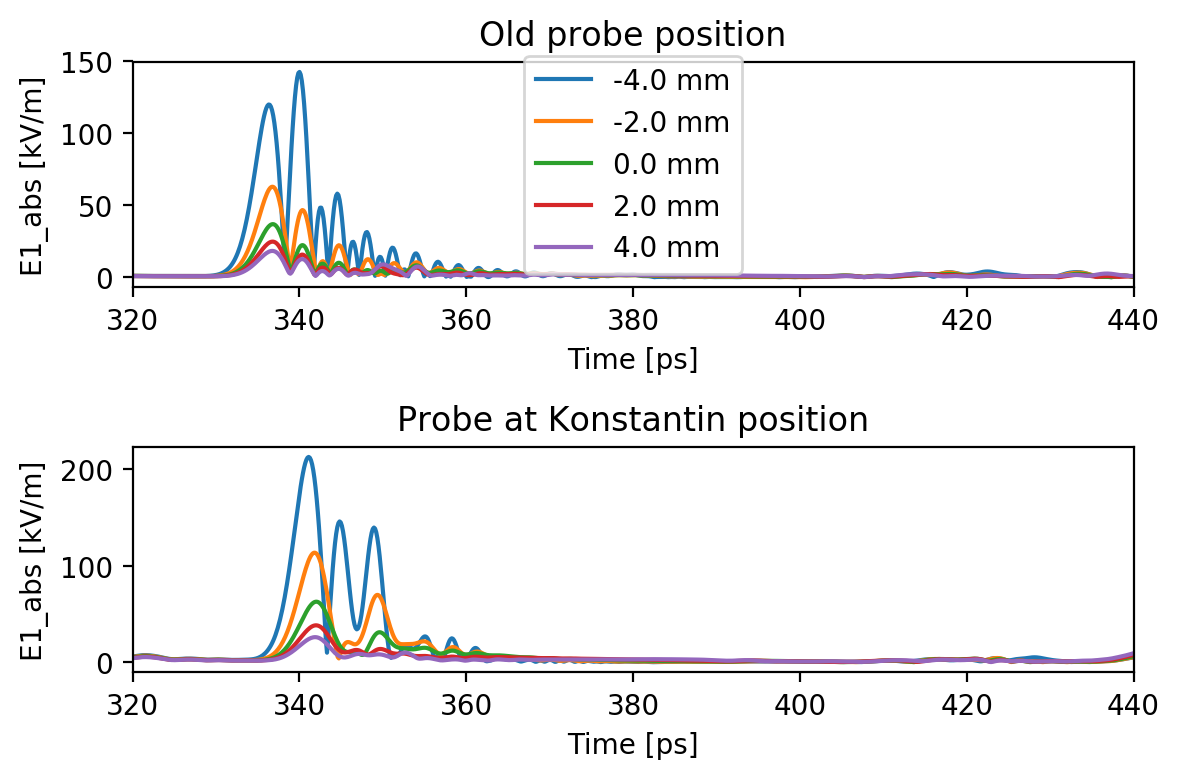

In [55]:
fig, ax = plt.subplots(2, dpi=200)

for k in beam_position:
    xx = 1e3*data['E-Field (-75 0 0)(Abs) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-75 0 0)(Abs) '].loc[k][1,:]
    ax[0].plot(xx, yy, label=str(k)+' mm')

ax[0].legend(frameon=True)
ax[0].set_title('Old probe position')
ax[0].set_xlabel('Time [ps]')
ax[0].set_ylabel('E1_abs [kV/m]')
ax[0].set_xlim(320,440)

for k in beam_position:
    xx = 1e3*data['E-Field (-25 0 35)(Abs) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-25 0 35)(Abs) '].loc[k][1,:]
    ax[1].plot(xx, yy, label=str(k)+' mm')

# ax[1].legend(frameon=True)
ax[1].set_title('Probe at Konstantin position')
ax[1].set_xlabel('Time [ps]')
ax[1].set_ylabel('E1_abs [kV/m]')
ax[1].set_xlim(320,440)

plt.tight_layout()

# plt.savefig('side_abs.png',format='png')

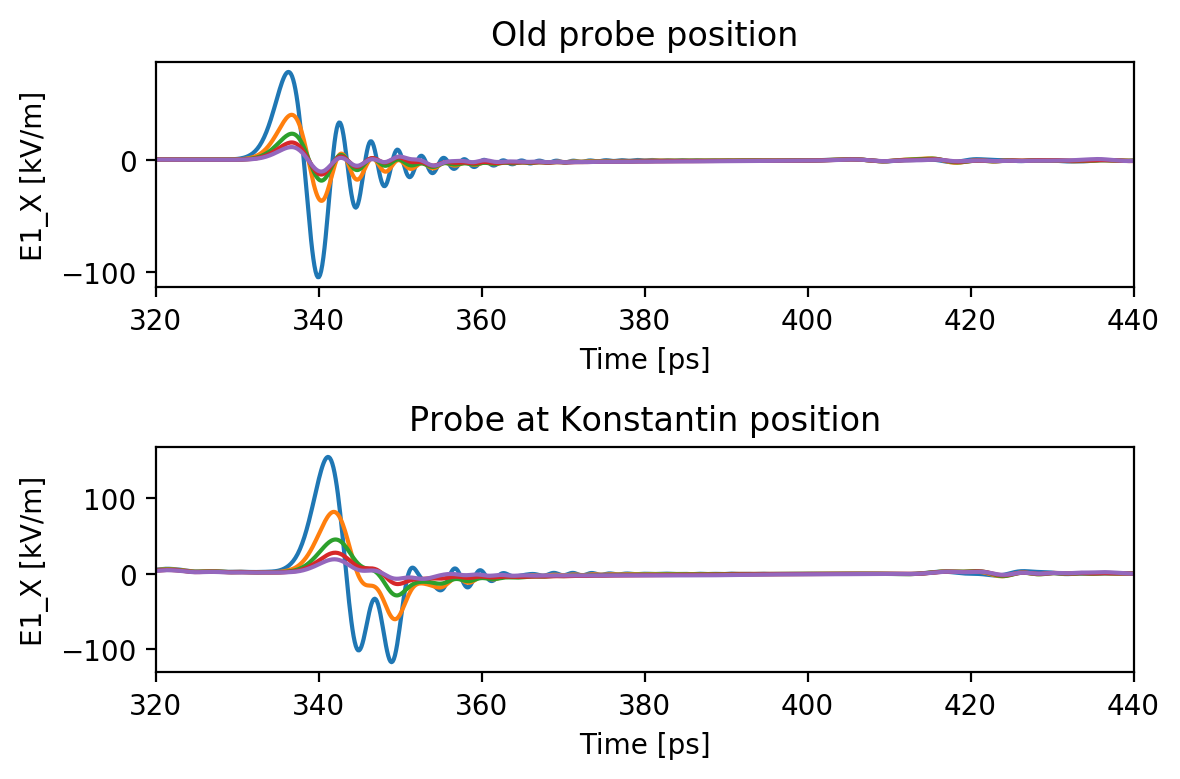

In [56]:
fig, ax = plt.subplots(2, dpi=200)

for k in beam_position:
    xx = 1e3*data['E-Field (-75 0 0)(X) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-75 0 0)(X) '].loc[k][1,:]
    ax[0].plot(xx, yy, label=str(k)+' mm')

# ax[0].legend(frameon=True)
ax[0].set_title('Old probe position')
ax[0].set_xlabel('Time [ps]')
ax[0].set_ylabel('E1_X [kV/m]')
ax[0].set_xlim(320,440)

for k in beam_position:
    xx = 1e3*data['E-Field (-25 0 35)(X) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-25 0 35)(X) '].loc[k][1,:]
    ax[1].plot(xx, yy, label=str(k)+' mm')

# ax[1].legend(frameon=True)
ax[1].set_title('Probe at Konstantin position')
ax[1].set_xlabel('Time [ps]')
ax[1].set_ylabel('E1_X [kV/m]')
ax[1].set_xlim(320,440)

plt.tight_layout()

# plt.savefig('side_abs.png',format='png')

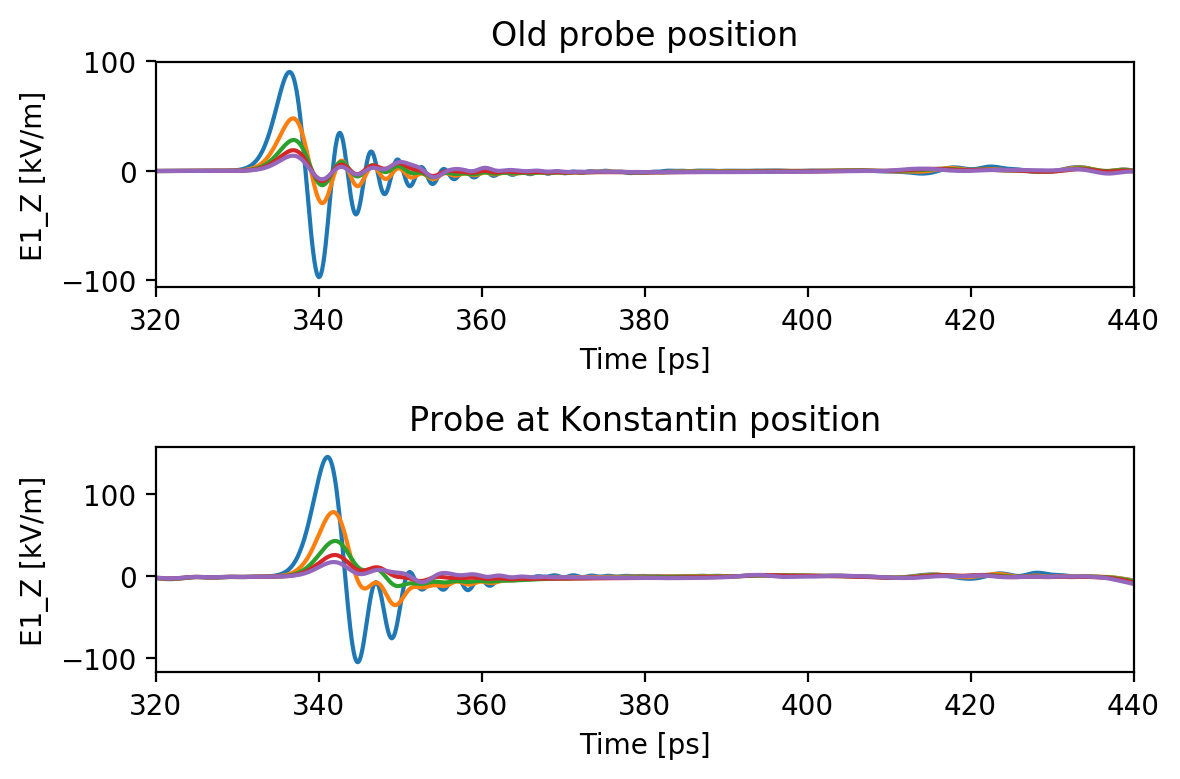

In [57]:
fig, ax = plt.subplots(2, dpi=200)

for k in beam_position:
    xx = 1e3*data['E-Field (-75 0 0)(Z) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-75 0 0)(Z) '].loc[k][1,:]
    ax[0].plot(xx, yy, label=str(k)+' mm')

# ax[0].legend(frameon=True)
ax[0].set_title('Old probe position')
ax[0].set_xlabel('Time [ps]')
ax[0].set_ylabel('E1_Z [kV/m]')
ax[0].set_xlim(320, 440)

for k in beam_position:
    xx = 1e3*data['E-Field (-25 0 35)(Z) '].loc[k][0,:]
    yy = 1e-3*data['E-Field (-25 0 35)(Z) '].loc[k][1,:]
    ax[1].plot(xx, yy, label=str(k)+' mm')

# ax[1].legend(frameon=True)
ax[1].set_title('Probe at Konstantin position')
ax[1].set_xlabel('Time [ps]')
ax[1].set_ylabel('E1_Z [kV/m]')
ax[1].set_xlim(320, 440)

plt.tight_layout()

# plt.savefig('side_abs.png',format='png')

# Get the peak-to-peak

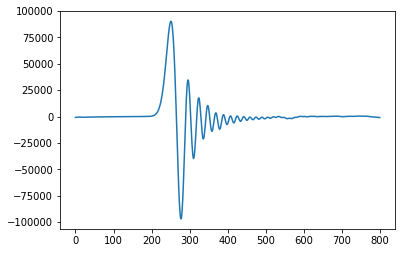

In [58]:
    yy = data['E-Field (75 0 0)(Z) '].loc[k][1,:][2200:3000]

plt.plot(yy)

In [59]:
Epp_abs1 = []
for k in beam_position:
    yy = data['E-Field (-75 0 0)(Abs) '].loc[k][1,:][2200:3000]
    Epp_abs1.append(np.max(yy))
Epp_abs1 = np.array(Epp_abs1)
    
Epp_X1 = []
for k in beam_position:
    yy = data['E-Field (-75 0 0)(X) '].loc[k][1,:][2200:3000]
    Epp_X1.append(np.max(yy)-np.min(yy))
Epp_X1 = np.array(Epp_X1)

Epp_Z1 = []
for k in beam_position:
    yy = data['E-Field (-75 0 0)(Z) '].loc[k][1,:][2200:3000]
    Epp_Z1.append(np.max(yy)-np.min(yy))
Epp_Z1 = np.array(Epp_Z1)

Epp_abs2 = []
for k in beam_position:
    yy = data['E-Field (75 0 0)(Abs) '].loc[k][1,:][2200:3000]
    Epp_abs2.append(np.max(yy))
Epp_abs2 = np.array(Epp_abs2)
    
Epp_X2 = []
for k in beam_position:
    yy = data['E-Field (75 0 0)(X) '].loc[k][1,:][2200:3000]
    Epp_X2.append(np.max(yy)-np.min(yy))
Epp_X2 = np.array(Epp_X2)

Epp_Z2 = []
for k in beam_position:
    yy = data['E-Field (75 0 0)(Z) '].loc[k][1,:][2200:3000]
    Epp_Z2.append(np.max(yy)-np.min(yy))
Epp_Z2 = np.array(Epp_Z2)

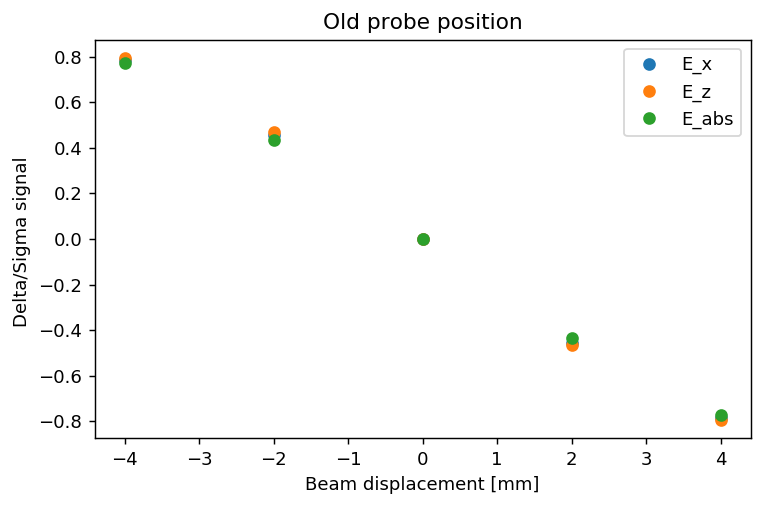

In [60]:
fig, ax = plt.subplots(1, dpi=130)

xx = beam_position
yy = (Epp_X1-Epp_X2)/(Epp_X1+Epp_X2)
ax.plot(xx, yy, 'o', label='E_x')

yy = (Epp_Z1-Epp_Z2)/(Epp_Z1+Epp_Z2)
ax.plot(xx, yy, 'o', label='E_z')

yy = (Epp_abs1-Epp_abs2)/(Epp_abs1+Epp_abs2)
ax.plot(xx, yy, 'o', label='E_abs')

ax.set_title('Old probe position')
ax.set_xlabel('Beam displacement [mm]')
ax.set_ylabel('Delta/Sigma signal ')
ax.legend(frameon=True)
plt.tight_layout()
plt.savefig('Delta_sigma_signal_1cm_old_position_1ns.png', format="png")

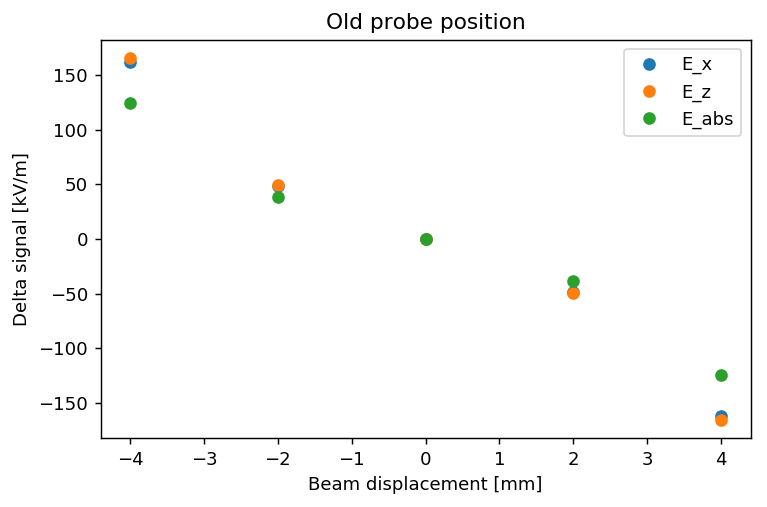

In [61]:
fig, ax = plt.subplots(1, dpi=130)

xx = beam_position
yy = 1e-3*(Epp_X1-Epp_X2)
ax.plot(xx, yy, 'o', label='E_x')

yy = 1e-3*(Epp_Z1-Epp_Z2)
ax.plot(xx, yy, 'o', label='E_z')

yy = 1e-3*(Epp_abs1-Epp_abs2)
ax.plot(xx, yy, 'o', label='E_abs')

ax.set_title('Old probe position')
ax.set_xlabel('Beam displacement [mm]')
ax.set_ylabel('Delta signal [kV/m]')
ax.legend(frameon=True)
plt.tight_layout()
plt.savefig('Delta_signal_1cm_old_position_1ns.png', format="png")

# New probe delta/sigma

In [62]:
def apply_bandpass_filter(freqs, f_spectrum, flow, fhi):
    ss = f_spectrum.copy()
    bool_idx =  np.logical_or(np.logical_and(freqs>flow, freqs<fhi), np.logical_and(freqs<-flow, freqs>-fhi))
    ss[~bool_idx] = 0.
    return ss

def dB(x):
    return 20*np.log10(x)


def doFFT(t, y):
    '''
    Do the FFT. Beware there is a factor 2 in the normalisation, so look at the right-hand side of the spectrum only.

    Inputs:
    - t:       the timescale
    - y:       the function value

    Outputs:
    - f_fft:        the frequncies
    - s_fft:        the power spectrum 
    
    Last modified: 24.06.2019 by Eugenio Senes
    '''
    assert t.size == y.size, 'Different size in X and Y in the doFFT function'
    dt = np.abs(t[1]-t[0])
    N_sample = t.size
    
#     norm = 2./N_sample
    
#     s_fft = norm*np.abs(np.fft.fft(y))    
    s_fft = np.fft.fft(y)

    f_fft = np.fft.fftfreq(N_sample, d=dt)
    df = np.abs(f_fft[1]-f_fft[0])
    
    # reorder the fft
    f_fft = np.fft.fftshift(f_fft)
    s_fft = np.fft.fftshift(s_fft)

    return f_fft, s_fft

def kill_tscale(time, signal, t_thr):
    sig2 = signal.copy()
    idx = time > t_thr
    sig2[idx] = 0.
    return sig2

def kill_tscale_early(time, signal, t_thr):
    sig2 = signal.copy()
    idx = time < t_thr
    sig2[idx] = 0.
    return sig2

def get_field_squared_full(x, y, time_thr=4.15e-10, t_thr_early=3.38e-10):
    yy = kill_tscale(x, y, time_thr)
    yy = kill_tscale_early(x, yy, t_thr_early)
    ff, sf = doFFT(x, yy)
    sf_sq = sf*np.conj(sf)
    return np.sum(sf_sq[-int(len(sf_sq)/2):])

def get_field_squared_84(x, y, time_thr=4.15e-10, t_thr_early=3.38e-10):
    yy = kill_tscale(x, y, time_thr)
    yy = kill_tscale_early(x, yy, t_thr_early)
    ff, sf = doFFT(x, yy)
    sf_sq = sf*np.conj(sf)
    sf_sq_cut = apply_bandpass_filter(ff, sf_sq, 83e9, 85e9)
    return np.sum(sf_sq_cut[-int(len(sf_sq_cut)/2):])

def get_field_squared_113(x, y, time_thr=4.15e-10, t_thr_early=3.38e-10):
    yy = kill_tscale(x, y, time_thr)
    yy = kill_tscale_early(x, yy, t_thr_early)
    ff, sf = doFFT(x, yy)
    sf_sq = sf*np.conj(sf)
    sf_sq_cut = apply_bandpass_filter(ff, sf_sq, 104.5e9, 122.5e9)
    return np.sum(sf_sq_cut[-int(len(sf_sq_cut)/2):])


In [63]:
# bandpass on both sides
E_sx_84GHz = []
E_dx_84GHz = []
E_sx_113GHz = []
E_dx_113GHz = []
E_sx_full = []
E_dx_full = []

for k in beam_position:
    # 84 GHz
    tt1 = 1e-9*data['E-Field (-25 0 35)(X) '].loc[k][0,:]
    yy1 = data['E-Field (-25 0 35)(X) '].loc[k][1,:]
    Ex_sq = get_field_squared_84(tt1, yy1)

    tt2 = 1e-9*data['E-Field (-25 0 35)(Z) '].loc[k][0,:]
    yy2 = data['E-Field (-25 0 35)(Z) '].loc[k][1,:]
    Ez_sq = get_field_squared_84(tt2, yy2)

    E_sx_84GHz.append(Ex_sq + Ez_sq)

    tt1 = 1e-9*data['E-Field (25 0 35)(X) '].loc[k][0,:]
    yy1 = data['E-Field (25 0 35)(X) '].loc[k][1,:]
    Ex_sq = get_field_squared_84(tt1, yy1)

    tt2 = 1e-9*data['E-Field (25 0 35)(Z) '].loc[k][0,:]
    yy2 = data['E-Field (25 0 35)(Z) '].loc[k][1,:]
    Ez_sq = get_field_squared_84(tt2, yy2)

    E_dx_84GHz.append(Ex_sq + Ez_sq)
    
    # 113.5 GHz
    tt1 = 1e-9*data['E-Field (-25 0 35)(X) '].loc[k][0,:]
    yy1 = data['E-Field (-25 0 35)(X) '].loc[k][1,:]
    Ex_sq = get_field_squared_113(tt1, yy1)

    tt2 = 1e-9*data['E-Field (-25 0 35)(Z) '].loc[k][0,:]
    yy2 = data['E-Field (-25 0 35)(Z) '].loc[k][1,:]
    Ez_sq = get_field_squared_113(tt2, yy2)

    E_sx_113GHz.append(Ex_sq + Ez_sq)

    tt1 = 1e-9*data['E-Field (25 0 35)(X) '].loc[k][0,:]
    yy1 = data['E-Field (25 0 35)(X) '].loc[k][1,:]
    Ex_sq = get_field_squared_113(tt1, yy1)

    tt2 = 1e-9*data['E-Field (25 0 35)(Z) '].loc[k][0,:]
    yy2 = data['E-Field (25 0 35)(Z) '].loc[k][1,:]
    Ez_sq = get_field_squared_113(tt2, yy2)

    E_dx_113GHz.append(Ex_sq + Ez_sq)
    
    # Full BW
    tt1 = 1e-9*data['E-Field (-25 0 35)(X) '].loc[k][0,:]
    yy1 = data['E-Field (-25 0 35)(X) '].loc[k][1,:]
    Ex_sq = get_field_squared_full(tt1, yy1)

    tt2 = 1e-9*data['E-Field (-25 0 35)(Z) '].loc[k][0,:]
    yy2 = data['E-Field (-25 0 35)(Z) '].loc[k][1,:]
    Ez_sq = get_field_squared_full(tt2, yy2)

    E_sx_full.append(Ex_sq + Ez_sq)

    tt1 = 1e-9*data['E-Field (25 0 35)(X) '].loc[k][0,:]
    yy1 = data['E-Field (25 0 35)(X) '].loc[k][1,:]
    Ex_sq = get_field_squared_full(tt1, yy1)

    tt2 = 1e-9*data['E-Field (25 0 35)(Z) '].loc[k][0,:]
    yy2 = data['E-Field (25 0 35)(Z) '].loc[k][1,:]
    Ez_sq = get_field_squared_full(tt2, yy2)

    E_dx_full.append(Ex_sq + Ez_sq)
   

    
E_sx_84GHz = np.array(E_sx_84GHz)
E_dx_84GHz = np.array(E_dx_84GHz)
E_sx_113GHz = np.array(E_sx_113GHz)
E_dx_113GHz = np.array(E_dx_113GHz)
E_sx_full = np.array(E_sx_full)
E_dx_full = np.array(E_dx_full)


In [64]:
E_sx_84GHz

array([4.27446095e+13+0.j, 9.87738533e+12+0.j, 2.00328168e+12+0.j,
       5.03543564e+11+0.j, 1.65381780e+11+0.j])

In [65]:
E_dx_84GHz

array([1.65961165e+11+0.j, 5.00449093e+11+0.j, 2.00299228e+12+0.j,
       9.90259618e+12+0.j, 4.27329989e+13+0.j])

In [66]:
E_sx_113GHz

array([2.76001428e+14+0.j, 3.85828976e+13+0.j, 5.48031499e+12+0.j,
       1.82419002e+12+0.j, 2.21041547e+12+0.j])

In [67]:
E_dx_113GHz

array([2.21020848e+12+0.j, 1.80112427e+12+0.j, 5.47932207e+12+0.j,
       3.90171553e+13+0.j, 2.75852939e+14+0.j])

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


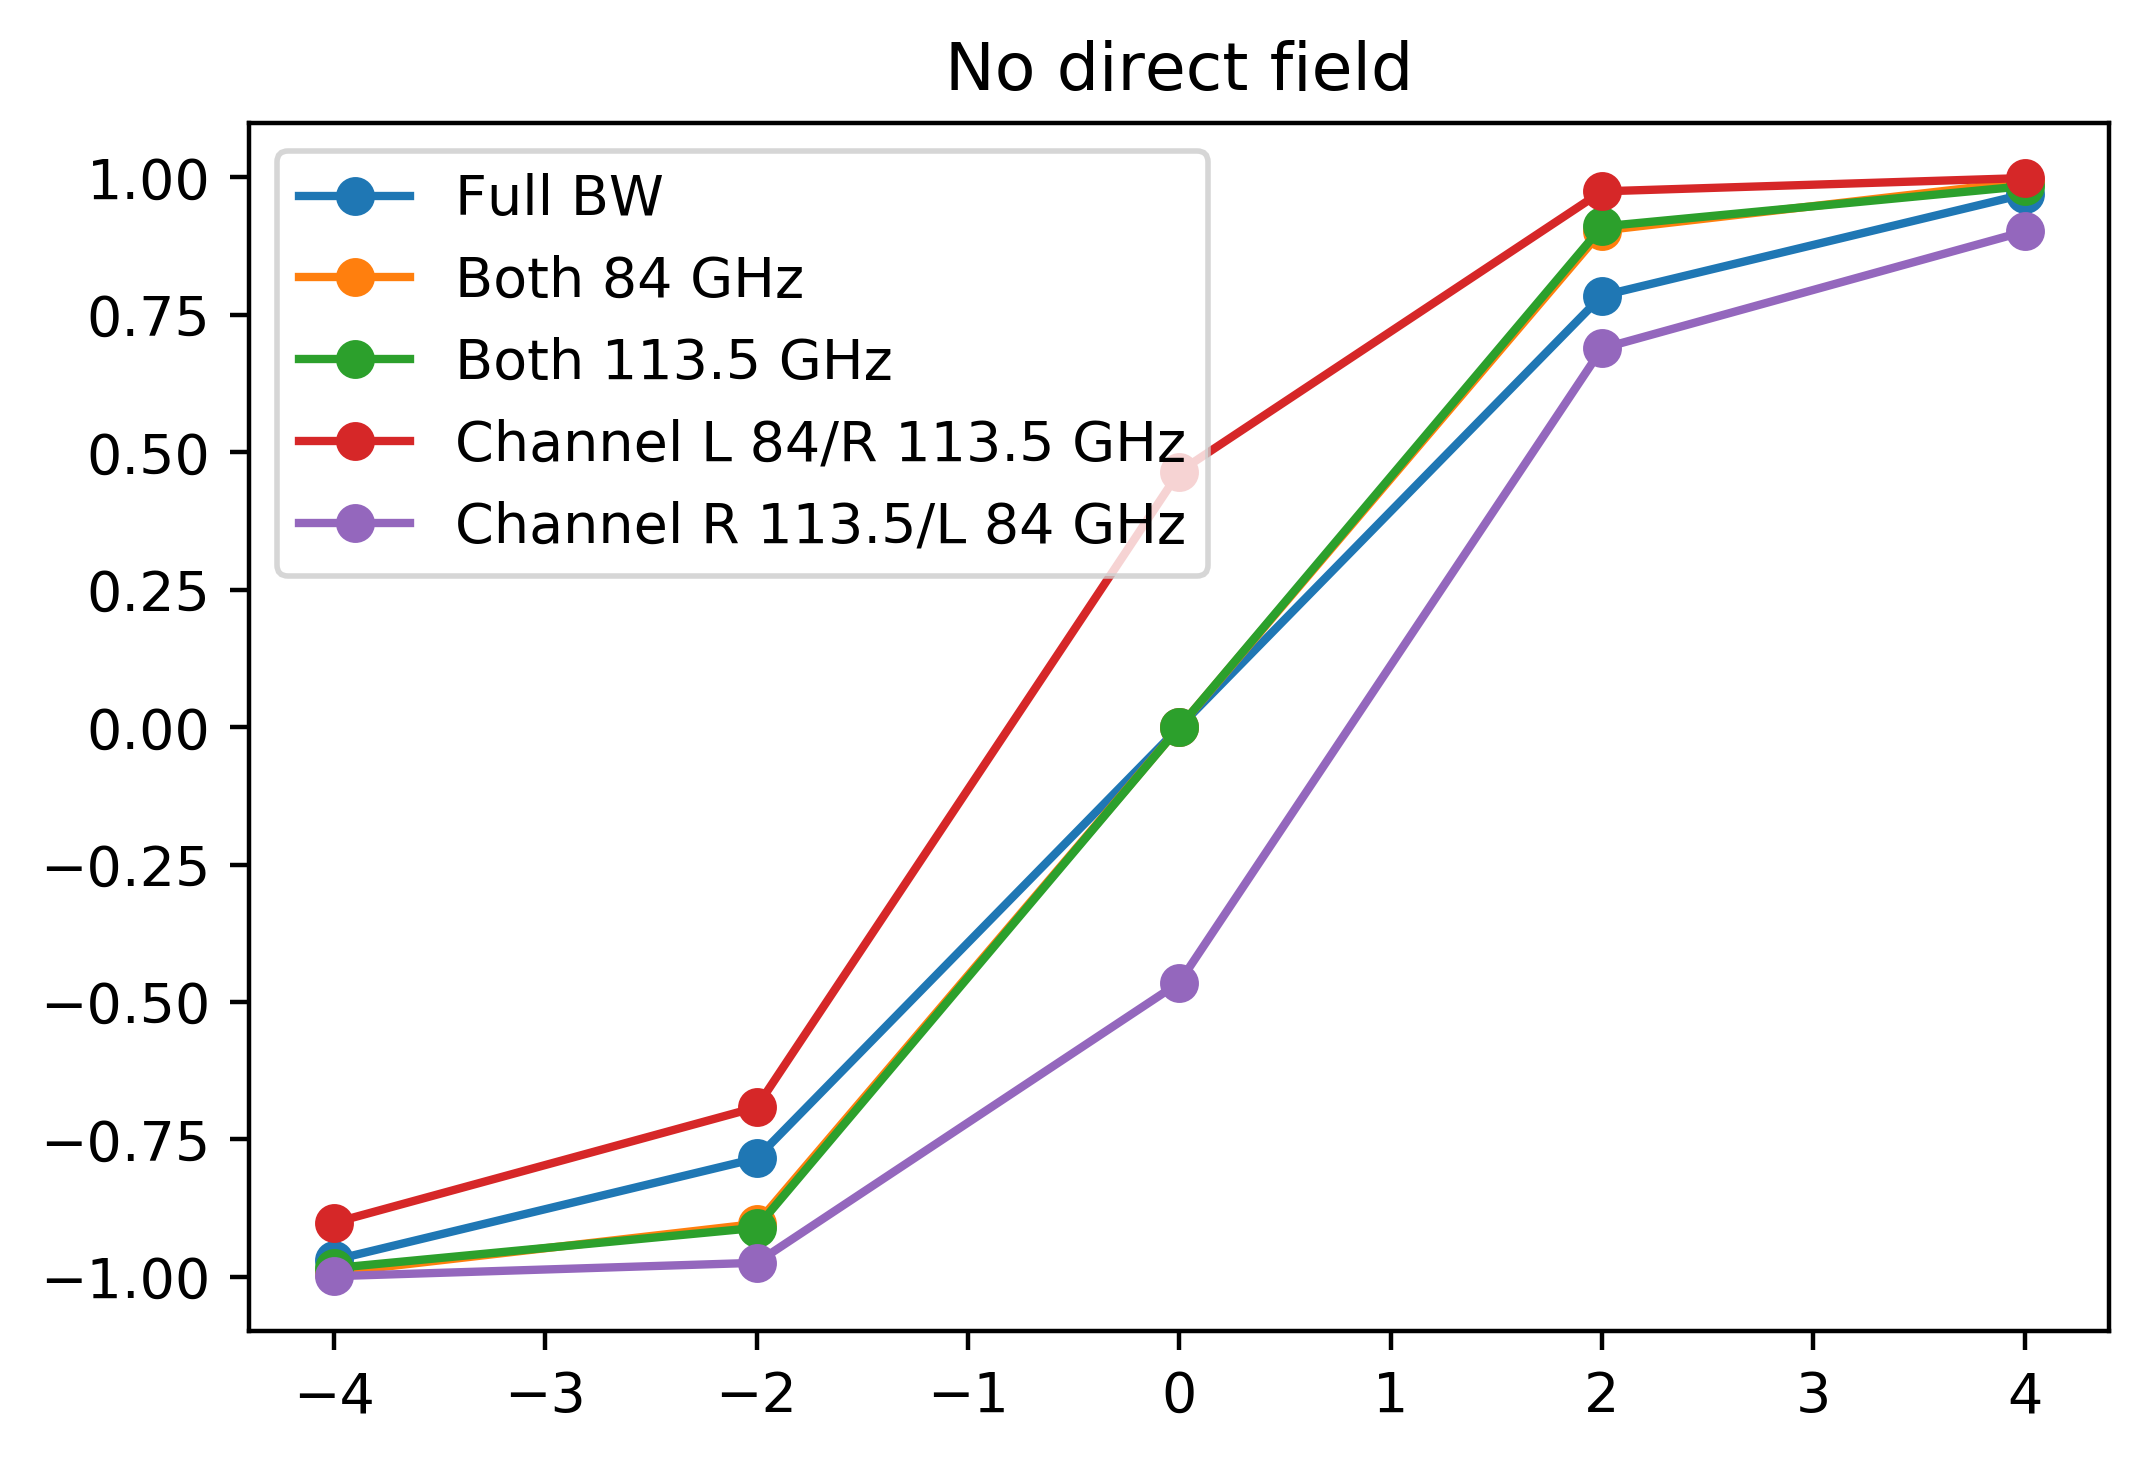

In [68]:
def delta_sigma(a,b):
    return (b-a)/(a+b)

plt.plot(beam_position,delta_sigma(E_sx_full, E_dx_full),'-o', label="Full BW")
plt.plot(beam_position,delta_sigma(E_sx_84GHz, E_dx_84GHz),'-o', label="Both 84 GHz")
plt.plot(beam_position,delta_sigma(E_sx_113GHz, E_dx_113GHz),'-o', label="Both 113.5 GHz")
plt.plot(beam_position,delta_sigma(E_sx_84GHz, E_dx_113GHz),'-o', label="Channel L 84/R 113.5 GHz")
plt.plot(beam_position,delta_sigma(E_sx_113GHz, E_dx_84GHz),'-o', label="Channel R 113.5/L 84 GHz")
plt.legend()

plt.title('No direct field')
fig = plt.gcf()
fig.dpi=400

In [69]:
full = delta_sigma(E_sx_full, E_dx_full)

In [50]:
old = -np.array([2.75802803e-05, -2.62488492e-01, -4.90373815e-01, -6.65479220e-01, -7.87680393e-01, -8.67708763e-01])

In [673]:
(full-old)/full

array([-1.59540494-0.j, -0.12138721+0.j, -0.10672038+0.j, -0.08760641+0.j,
       -0.07029336+0.j, -0.05118607+0.j])

In [51]:
(full-old)/full

array([-1.36497502-0.j, -0.04501926+0.j, -0.03891823+0.j, -0.03114162+0.j,
       -0.0238187 +0.j, -0.01679585+0.j])

In [70]:
data = pnd.DataFrame([], index = ["-4." , "-2.", "0.", "2." , "4."], columns = ["E_sx_full", "E_dx_full", "E_sx_84GHz", "E_dx_84GHz", "E_sx_113GHz", "E_dx_113GHz", "E_sx_84GHz", "E_dx_113GHz", "E_sx_113GHz", "E_dx_84GHz"])

data["E_sx_full"] = E_sx_full.real
data['E_dx_full'] = E_dx_full.real
data['E_sx_84GHz'] = E_sx_84GHz.real
data['E_dx_84GHz'] = E_dx_84GHz.real
data['E_sx_113GHz'] = E_sx_113GHz.real
data['E_dx_113GHz'] = E_dx_113GHz.real
data['E_sx_84GHz'] = E_sx_84GHz.real
data['E_dx_113GHz'] = E_dx_113GHz.real
data['E_sx_113GHz'] = E_sx_113GHz.real
data['E_dx_84GHz'] = E_dx_84GHz.real

data

,E_sx_full,E_dx_full,E_sx_84GHz,E_dx_84GHz,E_sx_113GHz,E_dx_113GHz,E_sx_84GHz,E_dx_113GHz,E_sx_113GHz,E_dx_84GHz
-4.,4.185158e+15,6.502021e+13,4.274461e+13,1.659612e+11,2.760014e+14,2.210208e+12,4.274461e+13,2.210208e+12,2.760014e+14,1.659612e+11
-2.,1.166293e+15,1.408959e+14,9.877385e+12,5.004491e+11,3.858290e+13,1.801124e+12,9.877385e+12,1.801124e+12,3.858290e+13,5.004491e+11
0.,3.693146e+14,3.692912e+14,2.003282e+12,2.002992e+12,5.480315e+12,5.479322e+12,2.003282e+12,5.479322e+12,5.480315e+12,2.002992e+12
2.,1.405252e+14,1.165028e+15,5.035436e+11,9.902596e+12,1.824190e+12,3.901716e+13,5.035436e+11,3.901716e+13,1.824190e+12,9.902596e+12
4.,6.475847e+13,4.184505e+15,1.653818e+11,4.273300e+13,2.210415e+12,2.758529e+14,1.653818e+11,2.758529e+14,2.210415e+12,4.273300e+13


In [71]:
data.to_csv('only_cherenkov_1ps.csv')

# Extrapolating to 1mm sigma electron beam

In [1]:
- extrapolate the curve 
- gaussian distribution of 1mm and average the curve on a moving average window. 

SyntaxError: invalid syntax (<ipython-input-1-65e21b647449>, line 1)

In [73]:
data = pnd.read_csv('only_cherenkov_1ps.csv')

In [74]:
data

,Unnamed: 0,E_sx_full,E_dx_full,E_sx_84GHz,E_dx_84GHz,E_sx_113GHz,E_dx_113GHz,E_sx_84GHz.1,E_dx_113GHz.1,E_sx_113GHz.1,E_dx_84GHz.1
0,-4.0,4.185158e+15,6.502021e+13,4.274461e+13,1.659612e+11,2.760014e+14,2.210208e+12,4.274461e+13,2.210208e+12,2.760014e+14,1.659612e+11
1,-2.0,1.166293e+15,1.408959e+14,9.877385e+12,5.004491e+11,3.858290e+13,1.801124e+12,9.877385e+12,1.801124e+12,3.858290e+13,5.004491e+11
2,0.0,3.693146e+14,3.692912e+14,2.003282e+12,2.002992e+12,5.480315e+12,5.479322e+12,2.003282e+12,5.479322e+12,5.480315e+12,2.002992e+12
3,2.0,1.405252e+14,1.165028e+15,5.035436e+11,9.902596e+12,1.824190e+12,3.901716e+13,5.035436e+11,3.901716e+13,1.824190e+12,9.902596e+12
4,4.0,6.475847e+13,4.184505e+15,1.653818e+11,4.273300e+13,2.210415e+12,2.758529e+14,1.653818e+11,2.758529e+14,2.210415e+12,4.273300e+13


1.7706105678860773e-15


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


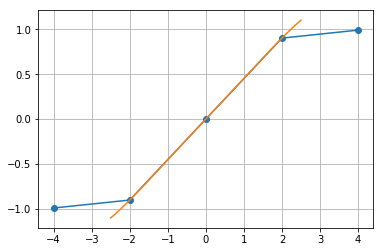

In [76]:
def delta_sigma(a,b):
    return (b-a)/(a+b)
x = data['Unnamed: 0'].values
y = delta_sigma(data['E_sx_84GHz'].values, data['E_dx_84GHz'].values)
#mirror
# x = np.concatenate((-np.flip(x[1:]), x), axis=0)
# y = np.concatenate((-np.flip(y[1:]), y), axis=0)
plt.plot(x, y,'-o')
plt.grid()
# now" extrapolate
pol = np.poly1d(np.polyfit(x, y, 7))
x_new = np.linspace(-2.5, 2.5, 101)
plt.plot(x_new, pol(x_new))
print(np.sum(pol(x)-y))

In [77]:
# import scipy.special

# x_gauss = np.linspace(-2.5,2.5, 101)
# yy = scipy.special.erf(x_gauss)
# plt.plot(x_gauss, yy, label='erf(x)')
# plt.plot(x_new, pol(x_new), label='BPM response')

# dt = x_gauss[1]-x_gauss[0]
# conv = dt*scipy.signal.convolve(pol(x_new), yy, mode='same')
# plt.plot(x_new, conv, label='Convolution')
# plt.legend()

NameError: name 'scipy' is not defined

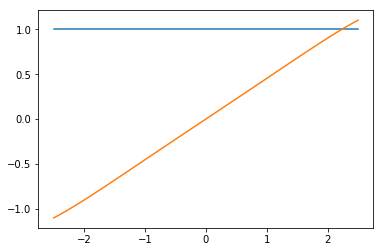

In [78]:
# import scipy.signal
from scipy.constants import c

def gaussian(x, A, mu, sigma):
    return A*np.exp(-0.5*(((x-mu)/sigma)**2))

x_gauss = np.linspace(-2.5,2.5, 101)
yy = gaussian(x_gauss, 1., 0., c/1e-3)
plt.plot(x_gauss, yy, label='Gaussian')
plt.plot(x_new, pol(x_new), label='BPM response')

dt = x_gauss[1]-x_gauss[0]
conv = dt*scipy.signal.convolve(pol(x_new), yy, mode='same')
plt.plot(x_new, conv, label='Convolution')
plt.title('0.5 mm sigma-beam')

# conv2 = scipy.signal.convolve(pol(x_new), yy, mode='same')/np.sum()
# plt.plot(x_new, conv2, label='Convolution2')


plt.legend()

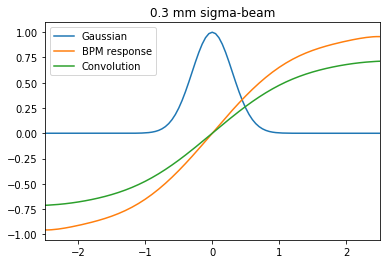

In [13]:
# padding to avoid the border effect
# PADDING --.> the polinomial continues with the same value 
pol_long = np.concatenate((pol(x_new)[0]*np.ones(100), pol(x_new), pol(x_new)[-1]*np.ones(100)))
dx = x_new[1]-x_new[0]
xnew_long = np.concatenate((np.linspace(x_new[0]-dx-99*dx, x_new[0]-dx, 100 ), x_new, np.linspace(x_new[-1]+dx, dx+x_new[-1]+99*dx, 100 )))


x_gauss = np.linspace(np.min(xnew_long), np.max(xnew_long), len(xnew_long))
yy = gaussian(x_gauss, 1., 0., 0.3)
plt.plot(x_gauss, yy, label='Gaussian')
plt.plot(xnew_long, pol_long, label='BPM response')



dt = x_gauss[1]-x_gauss[0]
conv = dt*scipy.signal.convolve(pol_long, yy, mode='same')
plt.plot(xnew_long, conv, label='Convolution')
plt.title('0.3 mm sigma-beam')

plt.xlim(-2.5,2.5)

plt.legend()